<a href="https://colab.research.google.com/github/reshmi416/PRODIGYINFOTECH_DS_3/blob/main/PRODIGYINFOTECH_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from zipfile import ZipFile

# Extract the ZIP file
with ZipFile('/content/bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the files in /content/ directory after extraction
print(os.listdir('/content/'))


['.config', 'bank-additional.zip', 'bank.zip', 'bank+marketing.zip', 'sample_data']


In [ ]:
# Print files in the extracted directory
print(os.listdir('/content/'))


['.config', 'bank-additional.zip', 'bank.zip', 'bank+marketing.zip', 'sample_data']


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

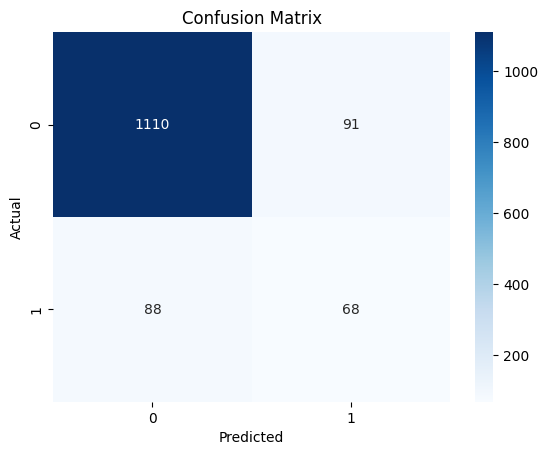

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/bank.csv', sep=';')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Preprocess the dataset
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Define features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
